# Best Markets for Advertising

In this scenario we are data analysts for an online e-learning company that specializes in programming courses. We cover domains such as data science, game development, but our primary focus is web and mobile development.
Our goal is to promote our products and invest money in more advertisement, but to do that we need to know what markets to advertise in.

The company operates subscription-based learning . The current price to access our learning platform is 59 USD per month.

It's costly to organize surveys, but to start with we can use two datasets from an e-learning platform called freeCodeCamp. In 2016and 2017 they performed a survey aimed at a new programmers. This survey is a good candidate to begin our analysis.

*https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969*

Github repository:
*https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data* Survey Year 2017

*https://github.com/freeCodeCamp/2016-new-coder-survey#about-the-data* Survey Year 2016

(Limitations (Need to include))

We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Method
* Load datasets
* Clean dataframes, including standardizing any columns if needed
* Concatenate/merge datasets
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization




### Stack Overflow survey
Each year, we at Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences. This year marks the eighth year we’ve published our Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey in January 2018.

This year, we covered a few new topics ranging from artificial intelligence to ethics in coding. We also found that underrepresented groups in tech responded to our survey at even lower rates than we would expect from their participation in the workforce. Want to dive into the results yourself and see what you can learn about salaries or machine learning or diversity in tech? We look forward to seeing what you find!

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use("fivethirtyeight")
%matplotlib inline

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 
csv = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory= False)
exchange = pd.read_csv("survey_results_public.csv", low_memory= False)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [93]:
csv.head()

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,HasStudentDebt,StudentDebtOwe,Year
0,27.0,0.0,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.0,0.0,1.0,0.0,15.0,NaN,NaN,0.0,0.0,0.0,NaN,start your own business,NaN,English,married or domestic partnership,150.0,6.0,"some college credit, no degree",NaN,NaN,NaN,NaN,0.0,NaN,2017
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,"some college credit, no degree",NaN,Full-Stack Web Developer,NaN,35000.0,1.0,NaN,2017
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo...",NaN,70000.0,NaN,NaN,2017
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve...",NaN,40000.0,0.0,NaN,2017
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security...",NaN,140000.0,NaN,NaN,2017


In [3]:
csv2016 = pd.read_csv("2016-fCC-New-Coders-Survey-Data.csv", low_memory = False)
csv2016

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobRoleInterestOther,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJsAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,NaN,0.0,male,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,30.0,cef35615d61b202f1dc794ef2746df14,48fd66e15301df9727e13e6e80aef941,32000.0,0.0,0.0,0.0,1.0,NaN,freelance,NaN,NaN,NaN,NaN,English,married or domestic partnership,0.0,1.0,2c6f0af42c,2016-03-29 21:24:53,2016-03-29 21:23:13,2016-03-29 21:27:25,2016-03-29 21:24:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,NaN,50000.0,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,323e5a113644d18185c743c241407754,a8cd67193184084b1e32b362225bf280,15000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a startup,1.0,Front-End Web Developer,NaN,in an office with other developers,English,NaN,20.0,2.0,d048ac774d,2016-03-29 21:27:09,2016-03-29 21:24:59,2016-03-29 21:29:10,2016-03-29 21:27:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front-end happy hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,United States of America,United States of America,finance,NaN,Employed for wages,NaN,NaN,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,20.0,b29a1027e5cd062e654a63764157461d,129b4479808fe006e768502b957a0c52,48000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,NaN,NaN,NaN,English,NaN,50.0,24.0,241513bbbe,2016-03-29 21:27:11,2016-03-29 21:25:37,2016-03-29 21:28:21,2016-03-29 21:27:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Na

In [94]:
exchange.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## Data Cleaning

The first step in our analysis is to identify the appropriate columns that are relevant. Unfortunately there are over 100 columns which is far too many for a practical analysis.

We can use the json file from the author's github repository page to identify useful and irrelevant columns. Unfortunately it's a rather manual and tedious process and there are far too many columns to list for deletion. Instead we'll sequentially drop slices of columns since we cannot drop lists and slices at the same time using python code.

In [4]:
# Index location of the first set of columns to drop
print(csv.columns.get_loc("CodeEventConferences"))
print(csv.columns.get_loc("CodeEventWorkshops"))

8
23


In [5]:
# Drops columns
csv = csv.drop(csv.iloc[:, 8:23], axis=1)

In [6]:
# Index location of the next set of columns to drop
print(csv.columns.get_loc("NetworkID"))
print(csv.columns.get_loc("ResourceW3S"))

59
100


In [7]:
csv = csv.drop(csv.iloc[:, 59:100], axis=1)

In [8]:
print(csv.columns.get_loc("YouTubeCodeCourse"))

63


In [9]:
# Drop remaining columns including index postion 63 and onward
csv = csv.drop(csv.iloc[:, 63:], axis=1)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
csv.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   BootcampFinish                 1069 non-null   float64
 3   BootcampLoanYesNo              1079 non-null   float64
 4   BootcampName                   949 non-null    object 
 5   BootcampRecommend              1073 non-null   float64
 6   ChildrenNumber                 2314 non-null   float64
 7   CityPopulation                 15354 non-null  object 
 8   CodeEventWorkshops             1753 non-null   float64
 9   CommuteTime                    9246 non-null   object 
 10  CountryCitizen                 15382 non-null  object 
 11  CountryLive                    15336 non-null  object 
 12  EmploymentField                8116 non-null  

In [11]:
csv.iloc[:,:20]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,1.0,45 to 60 minutes,South Africa,South Africa,NaN,IT support and website update,Employed for wages,NaN,NaN,0.0,1.0,male
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,Less than 15 minutes,United Kingdom,United Kingdom,education,NaN,Employed for wages,NaN,NaN,0.0,NaN,male


If we utilize the following code below we'll get a better understanding of missing data in the columns. We expect for a lot of columns to be missing data, because there are likely many instances of respondents failing to enter information during the survey. 

In [12]:
#pd.set_option('display.max_rows', None)  # or 1000
series = csv.apply(pd.isnull).sum()/csv.shape[0] * 100

# Columns with less than or equal to 60% missing data points
list = series[series <= 60].index


In [13]:
print(series)

Age                  15.449794
AttendedBootcamp      2.563961
BootcampFinish       94.118294
BootcampLoanYesNo    94.063274
BootcampName         94.778542
                       ...    
MonthsProgramming     6.002751
ResourceW3S          46.272352
SchoolDegree         15.444292
SchoolMajor          51.983494
StudentDebtOwe       81.502063
Length: 63, dtype: float64


In [14]:
# Converts the list of columns we want to use from pandas.index to list
cols_to_use = pd.Index.tolist(list)
cols_to_use.extend(["JobRoleInterest","BootcampFinish","ExpectedEarning","HasStudentDebt","StudentDebtOwe"])

# Isolates the dataframe down to only preferred columns
csv = csv[cols_to_use]

# Drop id.x and id.y columns
csv = csv.drop(columns=["ID.x","ID.y","ResourceW3S"])
csv

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,HasStudentDebt,StudentDebtOwe
0,27.0,0.0,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.0,0.0,1.0,0.0,15.0,NaN,NaN,0.0,0.0,0.0,NaN,start your own business,NaN,English,married or domestic partnership,150.0,6.0,"some college credit, no degree",NaN,NaN,NaN,NaN,0.0,NaN
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,"some college credit, no degree",NaN,Full-Stack Web Developer,NaN,35000.0,1.0,NaN
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo...",NaN,70000.0,NaN,NaN
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve...",NaN,40000.0,0.0,NaN
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security...",NaN,140000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,more than 1 million,I work from home,Indonesia,Indonesia,software development and IT,Self-employed freelancer,male,1.0,1.0,0.0,0.0,10.0,60000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,Indonesian,married or domestic partnership,10.0,1.0,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,0.0,NaN
18171,31.0,0.0,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.0,1.0,0.0,0.0,1.0,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,no preference,English,divorced,10000.0,1.0,high school diploma or equivalent (GED),NaN,"DevOps / SysAdmin, Mobile Developer, Pro...",NaN,70000.0,0.0,NaN
18172,39.0,0.0,more than 1 million,45 to 60 minutes,South Africa,South Africa,NaN,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,1000000.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Zulu,married or domestic partnership,19.0,3.0,some high school,NaN,NaN,NaN,NaN,0.0,NaN
18173,54.0,0.0,"between 100,000 and 1 million",Less than 15 minutes,United Kingdom,United Kingdom,education,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,1000000.0,0.0,0.0,0.0,1.0,NaN,freelance,NaN,English,divorced,0.0,5.0,"trade, technical, or vocational training",NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Count missing data
nulls = csv.apply(pd.isnull).sum()/csv.shape[0] * 100
nulls = nulls.sort_values()
nulls

IsSoftwareDev                     0.588721
AttendedBootcamp                  2.563961
MonthsProgramming                 6.002751
HoursLearning                     8.038514
MoneyForLearning                  8.792297
Gender                           14.971114
CountryCitizen                   15.367263
HasHighSpdInternet               15.378267
SchoolDegree                     15.444292
Age                              15.449794
CityPopulation                   15.521320
LanguageAtHome                   15.576341
CountryLive                      15.620358
MaritalStatus                    15.625860
HasFinancialDependents           15.658872
IsEthnicMinority                 15.856946
HasDebt                          15.867950
HasServedInMilitary              16.060523
IsReceiveDisabilitiesBenefits    16.247593
EmploymentStatus                 21.072902
JobPref                          25.815681
CommuteTime                      49.127923
IsUnderEmployed                  49.254470
SchoolMajor

In [16]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   CityPopulation                 15354 non-null  object 
 3   CommuteTime                    9246 non-null   object 
 4   CountryCitizen                 15382 non-null  object 
 5   CountryLive                    15336 non-null  object 
 6   EmploymentField                8116 non-null   object 
 7   EmploymentStatus               14345 non-null  object 
 8   Gender                         15454 non-null  object 
 9   HasDebt                        15291 non-null  float64
 10  HasFinancialDependents         15329 non-null  float64
 11  HasHighSpdInternet             15380 non-null  float64
 12  HasServedInMilitary            15256 non-null 

In [17]:
# New column to indicate year of survey completion
csv["Year"] = 2017
csv2016["Year"] = 2016

# Columns of interest
column_lists = csv.columns.to_list()
column_lists

# Apply column filtering to survey 2016
survey_2016 = csv2016[column_lists]

## Merge Dataframes

In [18]:
# Merge dataframes
combined_survey = pd.concat([csv, survey_2016])

Most of the courses offered on our e-learning platform are for web and mobile development. We need to identify if the sample from the dataset is representative of the population of new coders.

In [19]:
interests = combined_survey["JobRoleInterest"].value_counts(normalize=True) * 100
interests.head(20)

Full-Stack Web Developer                                                       25.150056
  Front-End Web Developer                                                      13.553168
Back-End Web Developer                                                          6.268989
  Data Scientist / Data Engineer                                                4.786958
  Mobile Developer                                                              3.934791
  User Experience Designer                                                      2.423120
  DevOps / SysAdmin                                                             1.889589
  Product Manager                                                               1.822897
  Data Scientist                                                                1.126343
  Quality Assurance Engineer                                                    0.881808
Game Developer                                                                  0.844757
Information Security 

A lot of people are interested in learning about web development (full stack, front end, and back end). However we have many more entries that include multiple categories, so it looks like we have a representative sample. While we have many different job interest categories, more than 60 % of the data points in the `JobRoleInterest` column are missing.

As there are many other entries that include multiple job categories we can split each string for each row in the `JobRoleInterest` column. This will help us understand the number of choices that each person selected. 

When we selected only the `JobRoleInterest` column from earlier we saw that many rows contained multiple job role interests or (categories). Some people stated they were interested in many, and some expressed interest in only one. To split the data points we'll need to exlude missing data, because we cannot split NaNs (missing data).

We can split each occurance of a job category for rows containing multiple categories. To do this we'll have to use `pandas.Series.str.split`. This approach will help us count every individual job category.

In [20]:
# New dataframe excluding any missing data from JobRoleInterest column
survey = combined_survey[combined_survey["JobRoleInterest"].notnull()].copy()

# Splits each occurence of a job category
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.split(",")

In [21]:
survey

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,HasStudentDebt,StudentDebtOwe,Year
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,35000.0,1.0,NaN,2017
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN,"[ Front-End Web Developer, Back-End Web Deve...",NaN,70000.0,NaN,NaN,2017
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,"some college credit, no degree",NaN,"[ Front-End Web Developer, Full-Stack Web De...",NaN,40000.0,0.0,NaN,2017
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,bachelor's degree,Information Technology,"[Full-Stack Web Developer, Information Securi...",NaN,140000.0,NaN,NaN,2017
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,female,1.0,0.0,1.0,0.0,16.0,40000.0,NaN,0.0,0.0,0.0,I'm already applying,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,12.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,30000.0,1.0,8000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,32.0,0.0,more than 1 million,40.0,Ukraine,Ukraine,health care,Employed for wages,female,0.0,1.0,1.0,0.0,5.0,36000.0,1.0,0.0,0.0,1.0,Within the next 6 months,work for a multinational corporation,in an office with other developers,Russian,married or domestic partnership,5.0,2.0,bachelor's degree,Linguistics,[ Front-End Web Developer],NaN,8400.0,NaN,NaN,2016
15598,51.0,0.0,"less than 100,000",30.0,United States of America,United States of America,finance,Employed for wages,male,1.0,1.0,1.0,1.0,30.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,100.0,12.0,"professional degree (MBA, MD, JD, etc.)",Investments and Securities,[Full-Stack Web Developer],NaN,100000.0,0.0,NaN,2016
15600,38.0,0.0,more than 1 million,90.0,United States of America,United States of America,finance,Employed for wages,male,0.0,1.0,1.0,0.0,6.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a startup,no preference,English,married or domestic partnership,500.0,12.0,bachelor's degree,Finance,[Full-Stack Web Developer],NaN,150000.0,NaN,NaN,2016
15608,40.0,0.0,more than 1 million,60.0,Australia,Australia,software development and IT,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a multinational corporation,in an 

In [22]:
survey["JobRoleInterest"]

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
                               ...                        
15585                          [  Front-End Web Developer]
15598                           [Full-Stack Web Developer]
15600                           [Full-Stack Web Developer]
15608                                [  DevOps / SysAdmin]
15615                           [Full-Stack Web Developer]
Name: JobRoleInterest, Length: 13495, dtype: object

In [23]:
# Counts each occurence of a particular category
category_count = dict()

# For loop for counting each individual category in the JobRoleInterest column
for categories in survey["JobRoleInterest"]: 
    for category in categories:
        if category in category_count:
            category_count[category] += 1 # counts category key if already present in dictionary
        else:
            category_count[category] = 1 # adds unique category key to dictionary if not already present

# Transforms dictionary to dataframe 
category_count = pd.DataFrame.from_dict(category_count, orient="index", columns= ["Count"])
category_count = category_count.reset_index(level = 0)
category_count = category_count.rename(columns = {"index":"Interests"})

In [24]:
category_count["Interests"].unique()

array(['Full-Stack Web Developer', '  Front-End Web Developer',
       ' Back-End Web Developer', '   DevOps / SysAdmin',
       '   Mobile Developer', ' Full-Stack Web Developer',
       ' Information Security', '   Front-End Web Developer',
       '   Quality Assurance Engineer', ' Game Developer',
       '   User Experience Designer', '  DevOps / SysAdmin',
       '   Data Scientist', ' Data Engineer', 'Back-End Web Developer',
       'Information Security', '  Data Scientist', '  Mobile Developer',
       '   Product Manager', 'Data Engineer', 'Game Developer',
       '  Product Manager', '  User Experience Designer',
       '  Quality Assurance Engineer', 'Ethical Hacker',
       ' security expert', ' Technical Writer', ' Researcher',
       'Systems Engineer', 'Desktop Applications Programmer', ' Robotics',
       'Non technical ', ' UI Design', 'Software engineer ',
       'email coder', ' Data analyst', ' I dont yet know',
       ' UX developer/designer', ' support scientific r

There are many different "job interests" throughout the survey, and it's obvious that respondents were able to write-in their own response to the question. The biggest downfall of this approach is that we end up with many different variations of the same career, different spelling and capitalization, and unknown responses. 

Python-Pandas counts these all as unique values so it is more difficult to get a completely accurate count. For example, different variations of "Front-End Developer". We do see some extra whitespace scattered throughout some of the values too. In order to clean up some of the values in this dataframe we'll strip any extra white space and change everything to lower case font.

In [25]:
# Strips whitespace, changes to lower case 
category_count["Interests"] = category_count["Interests"].str.lstrip().str.rstrip().str.lower()

# Groupy by interests and adds up the number of occurences
category_count.groupby("Interests").sum().sort_values(by = "Count", ascending= False).head(50)

,Count
Interests,
full-stack web developer,6769
front-end web developer,4912
back-end web developer,3476
mobile developer,2719
user experience designer,1744
data scientist,1643
game developer,1628
information security,1326
data engineer,1248


After some data cleaning we can see that it's not perfect, but we definitely can tell that we have quite a range of interests ranging from primarily web-development to data science, game development and many other interests.

While we have many mixed interests, this is a good way to show that individuals might be interested in other topics than just web-development. We also see that some individuals responded with different versions of "I don't know" (for now we shall leave this in). While we already got a good understanding of job interests in previous code output, this is certainly a more granular approach.

Now that we have a better understanding of why people are learning new coding skills, we also need to find out where most respondents are from. In order to advertise in the right markets we have to know where our potential customers are located. We can use the `CountryLive` column to find this information.

In [26]:
survey["CountryLive"].describe()

count                        12507
unique                         152
top       United States of America
freq                          6104
Name: CountryLive, dtype: object

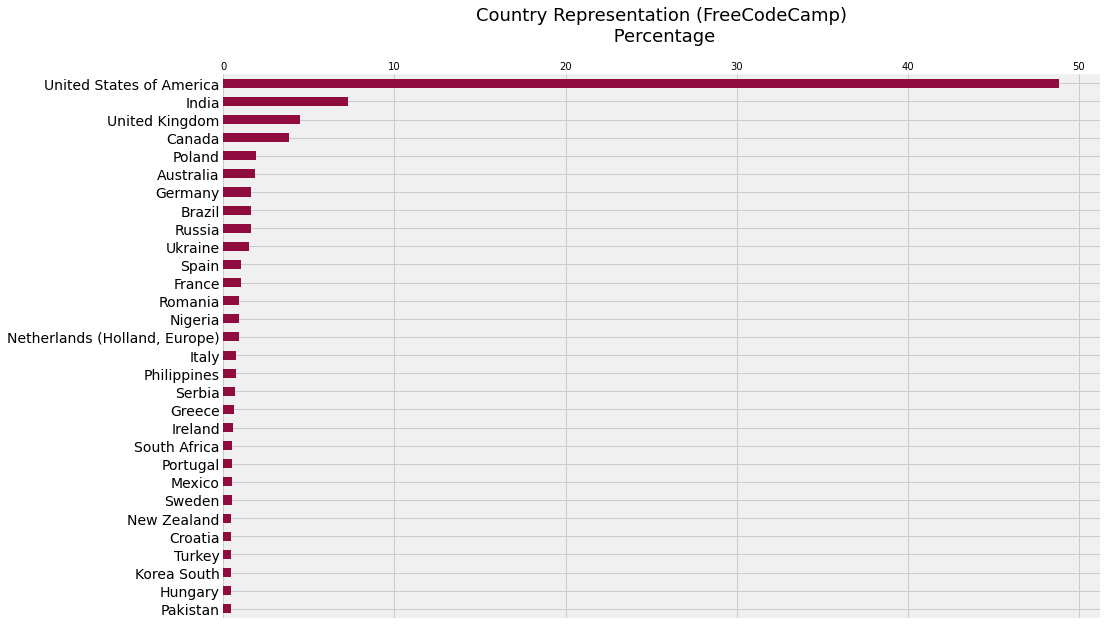

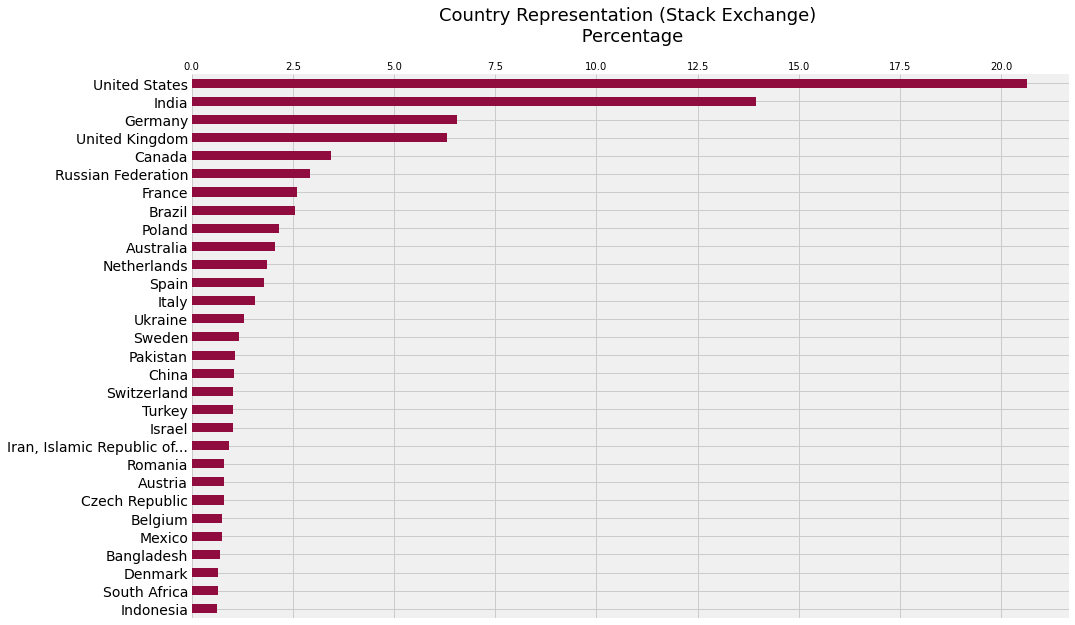

In [99]:
# Percentage of each country in dataframe
#sns.set_style("white")
fig, ax = plt.subplots(figsize = (14, 10))
ax = (survey["CountryLive"].value_counts(normalize= True).head(30) * 100).plot(kind="barh", color = "#900C3F")
plt.title("Country Representation (FreeCodeCamp)\n Percentage", size = 18, y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.yticks(size = 14)
plt.show()

fig, ax = plt.subplots(figsize = (14, 10))
ax = (exchange["Country"].value_counts(normalize= True).head(30) * 100).plot(kind="barh", color = "#900C3F")
plt.title("Country Representation (Stack Exchange) \n Percentage", size = 18, y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.yticks(size = 14)
plt.show()

A vast majority of respondents reside in the United States, followed by India at about 7 % and the United Kingdom at 5 %. Before making a decision, we need to find out how much are new programmers willing to spend on education. If we advertise in markets that are only interested in free learning we're unlikely to be profitable.

`MoneyForLearning` column describes the amount of money that survey participants have spent since the beginning of their programming journey. Since our business model operates on a monthly subscription we are interested in how much customers are willing to spend per month. To find that information we need to create a new column.

Formula: `MoneyForLearning` / `MonthsProgramming` 

We may need to limit our analysis to the following countries: US, India, UK, and Canada. Two reasons for this decision are:

* These countries have the highest frequency in the dataset
* The e-learning program is in English, and English is an official language in all these four countries. We'd like to maximize our chances of advertising to the right audience.


In [28]:
survey["MonthsProgramming"].value_counts().head(20)

1.0     1373
6.0     1371
12.0    1334
3.0     1273
2.0     1228
24.0     821
4.0      733
5.0      557
36.0     441
0.0      421
8.0      412
10.0     320
18.0     288
7.0      246
9.0      229
20.0     194
48.0     190
30.0     149
60.0     143
15.0     143
Name: MonthsProgramming, dtype: int64

To avoid dividing by zero, we'll need to change that particular value with 1. We can at least assume that respondents that answered with 0 months experience had probably just started and had only a few weeks of experience. For simplicity we'll change it to 1.

In [29]:
# Set new copy
spending = survey.copy()

# Replaces any instances of "zero months programming" (0) with (1) for proper calculation
spending["MonthsProgramming"] = spending["MonthsProgramming"].replace({0:1})

In [30]:
spending["MonthsProgramming"].describe()

count    12877.000000
mean        13.280345
std         27.082425
min          1.000000
25%          3.000000
50%          6.000000
75%         14.000000
max        744.000000
Name: MonthsProgramming, dtype: float64

In [31]:
# Calculates monthly spending by dividing money for learning with number of months programming
spending["Monthly_spending"] = spending["MoneyForLearning"] / spending["MonthsProgramming"]
spending["Monthly_spending"].value_counts(dropna=False)


0.000000        5769
NaN             1140
16.666667        297
50.000000        264
100.000000       246
                ... 
130.000000         1
80000.000000       1
76.000000          1
47.222222          1
1600.000000        1
Name: Monthly_spending, Length: 707, dtype: int64

In [32]:
# Total number of missing data points in monthly_spending column
spending["Monthly_spending"].isna().sum()

1140

In [33]:
# Drop missing data from following columns
spending = spending.dropna(subset=["CountryLive","Monthly_spending"])

# Groupby and calculate mean
avg_month = spending.groupby("CountryLive").mean()

# Shows only four countries selected below
avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]]

CountryLive
United States of America    256.969675
India                       100.449884
United Kingdom               93.828988
Canada                      141.571630
Name: Monthly_spending, dtype: float64

* The United States spends the most out of the top four countries (at a significant amount compared to the other three)
* Surprisingly, UK spends the least eventhough the country's GDP per capita is higher than India's
* A box plot will show any discrepencies/outliers

In [34]:
# Assigns new variable for countries listed below
four_countries = spending[spending["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

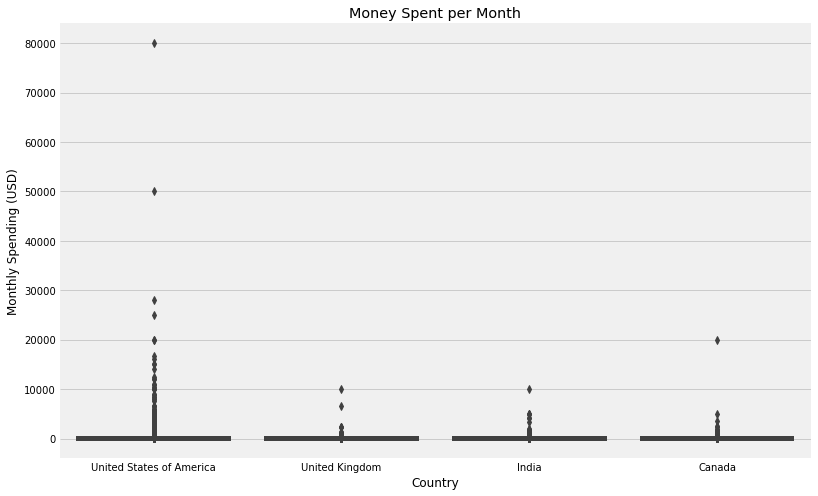

In [35]:
# Plot results of outliers in USA, India, UK, and Canada
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "CountryLive", y = "Monthly_spending", data = four_countries)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.xlabel("Country")
plt.ylabel("Monthly Spending (USD)")
plt.title("Money Spent per Month")
plt.show()

It's still difficult to tell if the data is wrong or not with so many outliers in each country. There are far too many data points with `monthly_spending` values that exceed thousands of dollars that skew average monthly spending.
Using the `.value_counts()` method with bins set to 20 should give a clearer picture of the distribution of `monthly_spending`. With this we should be able to know where to isolate the data further.

In [171]:
# Value counts method shows distribution
spending["Monthly_spending"].value_counts(bins = 20, normalize= True) * 100

(-4.001, 200.0]     90.265874
(200.0, 400.0]       3.218471
(400.0, 600.0]       1.679202
(800.0, 1000.0]      1.259402
(600.0, 800.0]       0.848347
(1600.0, 1800.0]     0.393563
(1200.0, 1400.0]     0.367326
(1800.0, 2000.0]     0.306105
(1000.0, 1200.0]     0.271121
(1400.0, 1600.0]     0.271121
(2400.0, 2600.0]     0.271121
(3200.0, 3400.0]     0.201154
(2200.0, 2400.0]     0.166171
(2800.0, 3000.0]     0.131188
(3800.0, 4000.0]     0.104950
(2000.0, 2200.0]     0.069967
(2600.0, 2800.0]     0.061221
(3000.0, 3200.0]     0.043729
(3400.0, 3600.0]     0.043729
(3600.0, 3800.0]     0.026238
Name: Monthly_spending, dtype: float64

Even 4,000 USD per month is far higher than even the average college tuition in the United States, nonetheless, we'll use this amount as a cutoff for re-calculating the monthly spending of United States, India, UK, and Canada. This should result in slightly more accurate results that are not as heavily skewed by outliers.

In [37]:
# Isolate rows to include only monthly spending less than or equal to $4000
spending = spending[spending["Monthly_spending"] <= 4000]

# Monthly average spending by country
avg_month = spending.groupby("CountryLive").mean()
avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]]

CountryLive
United States of America    152.571980
India                        58.913546
United Kingdom               60.936755
Canada                       86.767070
Name: Monthly_spending, dtype: float64

The United States should be our first choice for advertising:
* The US has the highest number of new programmers
* Highest average monthly spending for learning programming

India could be the second choice:
* Second highest number of new programmers
* India's average monthly spending is below our subscription price, however as India has a vastly larger population than most countries, the potential for new customers likely offsets this downside

We could also send our results to the company's marketing team and allow them to decide, but we think these two picks are solid options for advertising our learning programs.

Is there a way to explain why people are learning new programming skills? The survey data from 2016 and 2017 indicates a variety of interests from web development, data science, game development, machine learning, etc... 
Respondents were asked about their current employment to include their job field and employment "type" (self-employed, employee, military, etc..). We'll see that our data is representative of many job fields other than IT and software development.

In [38]:
exchange = pd.read_csv("survey_results_public.csv", low_memory= False)
exchange

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [41]:
# Currency related columns
currency = exchange.columns[51:56].tolist()

# Columns up to index 38
columns = exchange.columns[:38].tolist()

# Age and gender columns
columns.extend(["Gender", "Age"])

# Add currency related columns to list
for i in currency:
    columns.append(i)

# Isolates dataframe down to columns from list "columns"
stk_exchange = exchange[columns].copy()

### Job Benefits and Satisfaction

In [73]:
# Rename job aspects and job benefits columns for easier comprehension
rename_cols = {
                "AssessJob1":"Industry_working_in",
                "AssessJob2":"Company_funding",
                "AssessJob3":"Department_working_in",
                "AssessJob4":"Technologies/Frameworks",
                "AssessJob5":"Compensation_and_benefits",
                "AssessJob6":"Company_culture",
                "AssessJob7":"WFH",
                "AssessJob8":"Professional_development",
                "AssessJob9":"Company_diversity",
                "AssessJob10":"Product_impact",
                "AssessBenefits1":"Compensation",
                "AssessBenefits2":"Stock_options",
                "AssessBenefits3":"Health_insurance",
                "AssessBenefits4":"Parental_leave",
                "AssessBenefits5":"Fitness_wellness_benefit",
                "AssessBenefits6":"Retirement",
                "AssessBenefits7":"Meals/snacks",
                "AssessBenefits8":"Computer/office_equipment",
                "AssessBenefits9":"Childcare_benefit",
                "AssessBenefits10":"Transportaion_benefit",
                "AssessBenefits11":"Conference/education_budget"
                }

stk_exchange = stk_exchange.rename(columns=rename_cols)

Participants were asked the following questions regarding employment opportunities:
- "Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance , where 1 is the most important and 10 is the least important.
- "Now, imagine you are assessing a job's benefits package. Please rank the following aspects of a job's benefits package from most to least important to you, where 1 is most important and 11 is least important.

By calculating the job aspects and benefits, on average the most important values should have a lower score (since 1 is most important, and 10 is least important).

In [156]:
stk_exchange["Country"].value_counts(dropna=False)

United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
                  ...  
Burundi               1
Belize                1
Grenada               1
Sierra Leone          1
Guinea-Bissau         1
Name: Country, Length: 184, dtype: int64

In [169]:
# Isolate rows only containing following countries listed below
stk_countries = stk_exchange[stk_exchange["Country"].str.contains("United States|India|United Kingdom|Canada", na = False)]
len(stk_countries["Country"])

43644

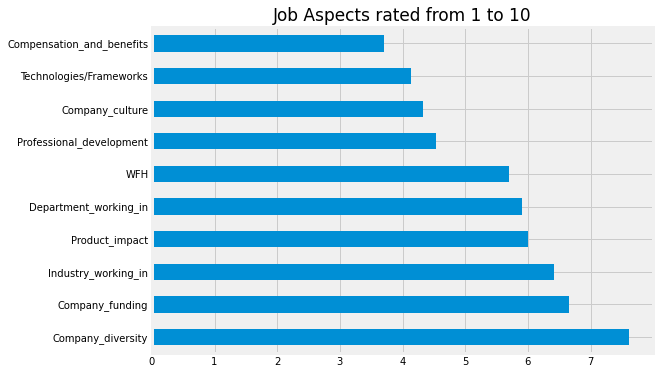

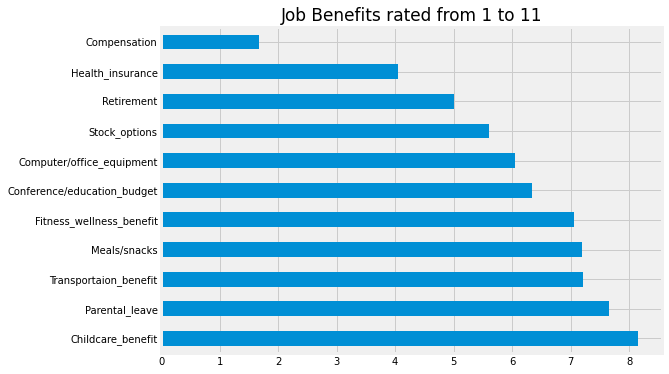

In [166]:
# If looking for a new job, rate importance of job aspects from 1(most important) to 10(least important)
fig, ax = plt.subplots(figsize = (8, 6))
job_assessment = stk_countries.iloc[:,17:27]

# Calculate average rating for job aspects
job_assessment.mean(axis=0).sort_values(ascending=False).plot.barh()
plt.title("Job Aspects rated from 1 to 10", size = 17)
plt.show()

# If looking for a new job, rate importance of job benefits from 1(most important) to 11(least important)
fig, ax = plt.subplots(figsize = (8, 6))
benefits = stk_countries.iloc[:,27:38]

# Calculate average rating for job benefits
benefits.mean(axis=0).sort_values(ascending=False).plot.barh()
plt.title("Job Benefits rated from 1 to 11", size = 17)
plt.show()

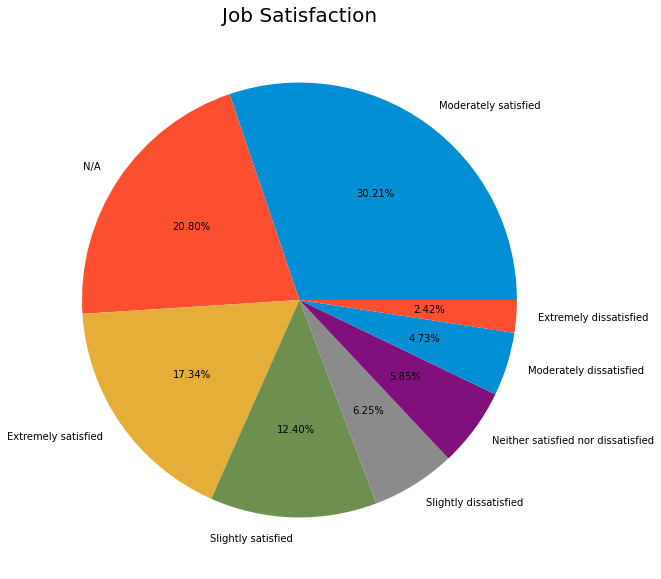

In [167]:
satisfaction = stk_countries["CareerSatisfaction"].value_counts(dropna= False)

labels = [
            "Moderately satisfied",
            "N/A",
            "Extremely satisfied", 
            "Slightly satisfied", 
            "Slightly dissatisfied", 
            "Neither satisfied nor dissatisfied",
            "Moderately dissatisfied",
            "Extremely dissatisfied"
         ]

# Job satisfaction
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(satisfaction, labels = labels, autopct= "%.2f%%")
plt.title("Job Satisfaction", size = 20)
plt.show()

Compensation is most important, participants are generally satisfied with current job, less than 20 % of participants indicated a form of dissatisfaction.

In [44]:
# Isolate rows from assigned variable four_countries
# Monthly spending is less than or equal to $4000 per month
# Re-assign to df
df = four_countries[four_countries["Monthly_spending"] <= 4000].reset_index(drop=True).copy()

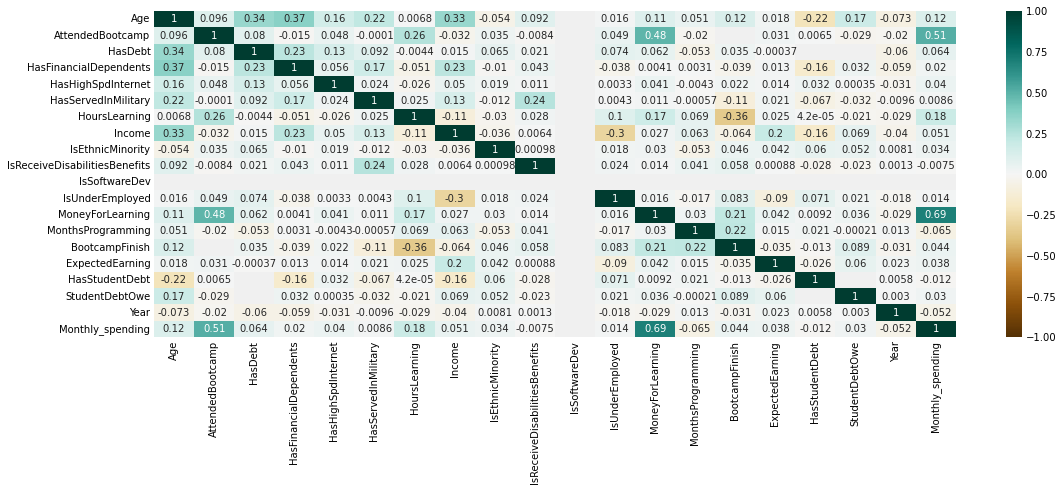

In [45]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

In [46]:
df

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,BootcampFinish,ExpectedEarning,HasStudentDebt,StudentDebtOwe,Year,Monthly_spending
0,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,35000.0,1.0,NaN,2017,13.333333
1,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,high school diploma or equivalent (GED),NaN,"[ Front-End Web Developer, Back-End Web Deve...",NaN,70000.0,NaN,NaN,2017,200.000000
2,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,female,1.0,0.0,1.0,0.0,16.0,40000.0,NaN,0.0,0.0,0.0,I'm already applying,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,12.0,"some college credit, no degree",NaN,[Full-Stack Web Developer],NaN,30000.0,1.0,8000.0,2017,0.000000
3,32.0,0.0,"less than 100,000",30 to 44 minutes,United States of America,United States of America,sales,Employed for wages,male,1.0,0.0,1.0,0.0,1.0,20000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,in an office with other developers,English,"single, never married",0.0,1.0,master's degree (non-professional),English,[Full-Stack Web Developer],NaN,40000.0,1.0,25000.0,2017,0.000000
4,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,Lithuania,United States of America,finance,Employed for wages,male,0.0,0.0,1.0,0.0,6.0,60000.0,0.0,0.0,0.0,0.0,Within the next 6 months,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,200.0,12.0,master's degree (non-professional),Political Science,[Full-Stack Web Developer],NaN,60000.0,NaN,NaN,2017,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,61.0,0.0,"less than 100,000",20.0,United States of America,United States of America,"farming, fishing, and forestry",Employed for wages,male,0.0,1.0,1.0,0.0,40.0,60000.0,0.0,0.0,0.0,1.0,Within 7 to 12 months,work for a medium-sized company,no preference,English,married or domestic partnership,500.0,240.0,bachelor's degree,Computer Programming,[Full-Stack Web Developer],NaN,80000.0,NaN,NaN,2016,2.083333
7465,42.0,0.0,"between 100,000 and 1 million",60.0,United States of America,United States of America,NaN,Self-employed business owner,female,1.0,1.0,1.0,0.0,25.0,60000.0,0.0,0.0,0.0,1.0,Within 7 to 12 months,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,1.0,bachelor's degree,Film and Video Studies,[Full-Stack Web Developer],NaN,60000.0,1.0,6500.0,2016,0.000000
7466,51.0,0.0,"less than 100,000",30.0,United States of America,United States of America,finance,Employed for wages,male,1.0,1.0,1.0,1.0,30.0,200000.0,0.0,0.0,0.0,0.0,more than 12 months from now,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,100.0,12.0,"professional degree (MBA, MD, JD, etc.)",Investments and Securities,[Full-Stack Web Developer],NaN,100000.0,0.0,NaN,2016,8.333333
7467,38.0,0.0,more than 1 million,90.0,United Sta

In [47]:
# Replaces following columns with True/False values
df["HasDebt"] = df["HasDebt"].replace({1.0:"True", 0.0: "False"})
df["HasFinancialDependents"] = df["HasFinancialDependents"].replace({1.0:"True", 0.0: "False"})
df["HasStudentDebt"] = df["HasStudentDebt"].replace({1.0:"True", 0.0: "False"})

Most survey participants indicated that they do not have financial dependents, but the number of people that have some form of debt outnumbers the ones that do not have debt. Simply having some type of debt does not neccessarily indicate that some one may be attempting to switch careers. 

### Age and Gender

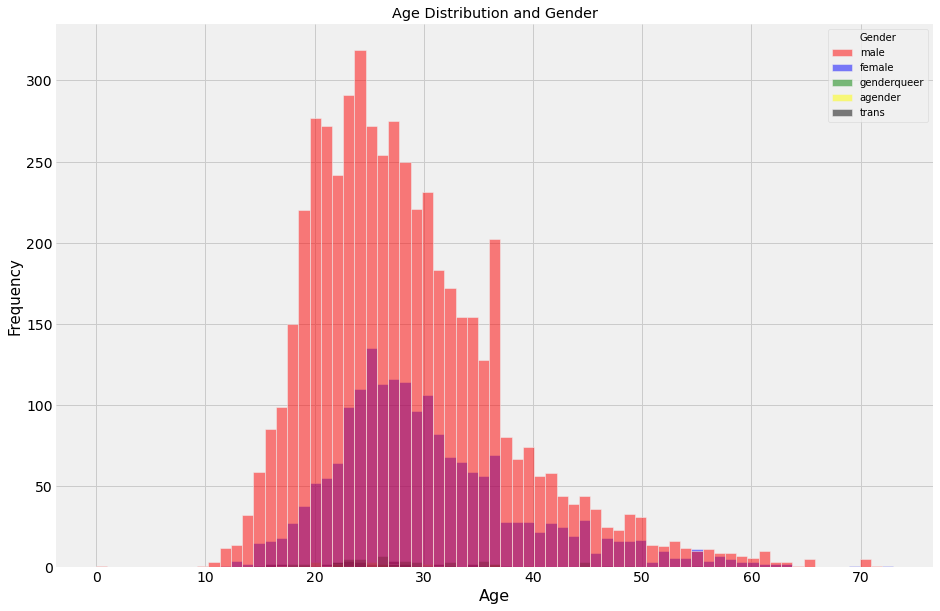

In [48]:
# Distribution of respondents by age and gender
fig, ax = plt.subplots(figsize = (14, 10))
palette = ["red", "blue", "green", "yellow", "black"]
ax = sns.histplot(x="Age", hue = "Gender", data = df, palette=palette)
plt.title("Age Distribution and Gender")
plt.ylabel("Frequency", size = 15)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xlabel("Age", size = 16)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.show()

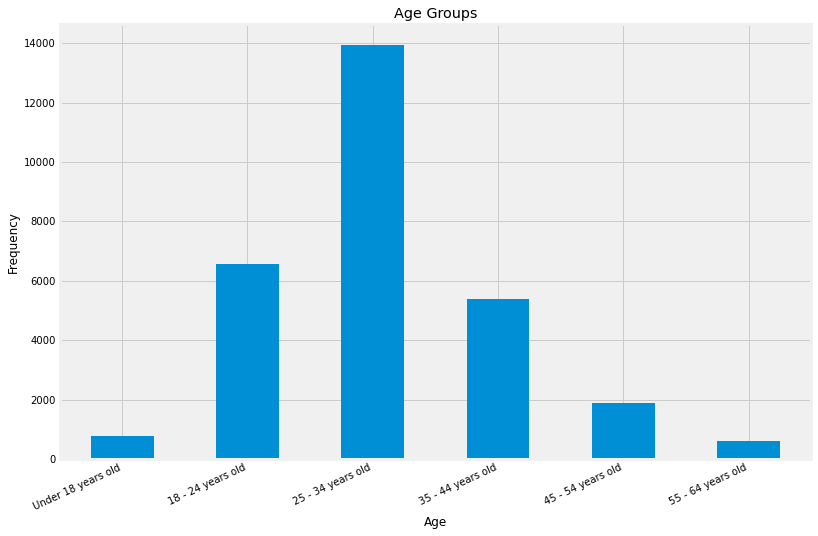

In [213]:
# Stack exchange age groups
fig, ax = plt.subplots(figsize = (12, 8))
ages = stk_countries["Age"].value_counts().iloc[[4,1,0,2,3,5]].plot.bar()
plt.xticks(rotation = 25, ha = "right")
plt.title("Age Groups")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

In [174]:
stk_countries["Gender"].value_counts()

Male                                                                         26588
Female                                                                        2192
Non-binary, genderqueer, or gender non-conforming                              166
Female;Transgender                                                             102
Male;Non-binary, genderqueer, or gender non-conforming                          56
Transgender                                                                     50
Female;Non-binary, genderqueer, or gender non-conforming                        36
Transgender;Non-binary, genderqueer, or gender non-conforming                   33
Female;Male                                                                     27
Male;Transgender                                                                23
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            21
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       18
Fema

### Income/Financial Situations
`Income`: Respondents were asked their current yearly income.

`ExpectedEarning`: "About how much money do you expect to earn per year at your first developer job, in US dollars?"

`Has Debt`: The question asked was "Do you have any debt?"

`HasStudentDebt`: "Do you have student loan debt?"

`StudentDebtOwe`: "About how much do you owe in student loans, in US dollars?


In [143]:
# Financial dependents
print("Financial Dependents:","\n", df["HasFinancialDependents"].value_counts(normalize = True, dropna=False) * 100) 
print("\n")

# Has debt of any kind
print("Has Debt:", "\n", df["HasDebt"].value_counts(normalize = True, dropna=False) * 100) 
print("\n")

# Student debt
print("HasStudentDebt:", "\n", df["HasStudentDebt"].value_counts(normalize = True, dropna=False) * 100) 

Financial Dependents: 
 False    75.739724
True     23.604231
NaN       0.656045
Name: HasFinancialDependents, dtype: float64


Has Debt: 
 True     56.767974
False    42.535815
NaN       0.696211
Name: HasDebt, dtype: float64


HasStudentDebt: 
 NaN      43.473022
True     39.496586
False    17.030392
Name: HasStudentDebt, dtype: float64


In [50]:
# All respondents that answered true to having debt (including student loans)
debt = (df["HasDebt"] == "True") & (df["HasStudentDebt"] == "True")

# Debt of some form including student loans
print("Avg. Expected Earnings (Has debt): ", "\n", df[debt]["ExpectedEarning"].mean())
print("\n")
print("Avg. Expected Earnings (Does not have debt): ", "\n", df[~debt]["ExpectedEarning"].mean())

Avg. Expected Earnings (Has debt):  
 60566.10624779386


Avg. Expected Earnings (Does not have debt):  
 61605.21431969553


Three quarters of survey participants do not have financial dependents, but many do have debt of some kind (generic or student loans). The calculation for average expected earnings between debt holders and non - debt holders is insignificant enough to be unable to state whether debt is a large motivator for a career shift to a higher paying job. 

In [145]:
df[df["HasStudentDebt"] == "True"]["StudentDebtOwe"].describe()

count      2784.000000
mean      35142.381825
std       38631.753396
min         500.000000
25%       10000.000000
50%       24000.000000
75%       45000.000000
max      400000.000000
Name: StudentDebtOwe, dtype: float64

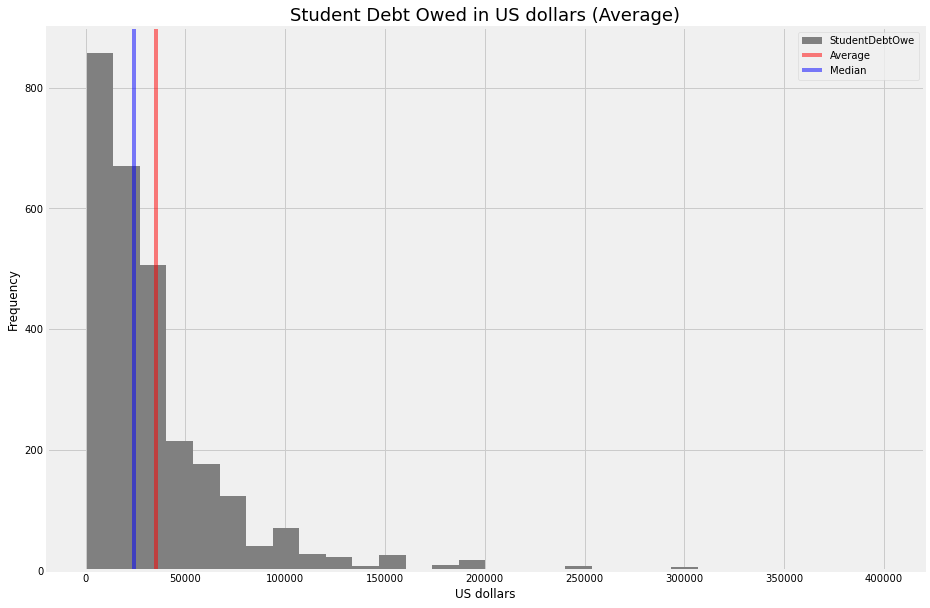

In [146]:
# Student debt owed in US dollars
fig, ax = plt.subplots(figsize = (14, 10))
df[df["HasStudentDebt"] == "True"]["StudentDebtOwe"].plot.hist(bins = 30, color = "grey")
plt.axvline(df[df["HasStudentDebt"] == "True"]["StudentDebtOwe"].mean(), color = "red", alpha = 0.5, label = "Average")
plt.axvline(df[df["HasStudentDebt"] == "True"]["StudentDebtOwe"].median(), color = "blue", alpha = 0.5, label = "Median")
plt.title("Student Debt Owed in US dollars (Average)", size = 18)
plt.xlabel("US dollars")
plt.legend()
plt.show()

Of the participants that owe student loans, the average amount is \$35,000, and we would most likely discover that a person will owe about \$10,000 to \$20,000 dollars.

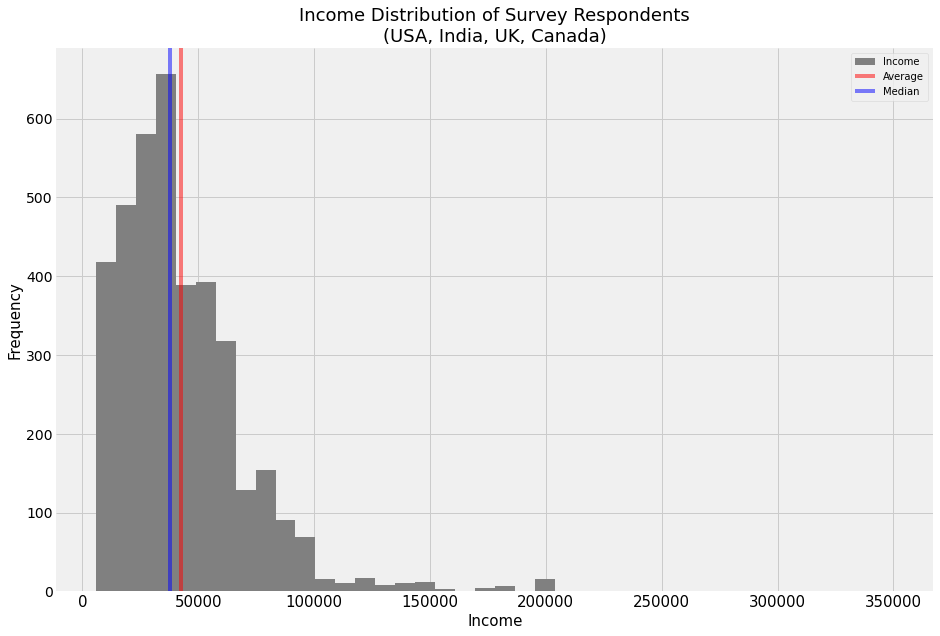

In [52]:
# Income distribution
fig, ax = plt.subplots(figsize = (14,10))
df["Income"].plot.hist(bins = 40, color = "grey")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.title("Income Distribution of Survey Respondents\n(USA, India, UK, Canada)", size = 18)
plt.axvline(df["Income"].mean(), color = "red", alpha = 0.5, label = "Average")
plt.axvline(df["Income"].median(), color = "blue", alpha = 0.5, label = "Median")
plt.ylabel("Frequency",size = 15)
plt.yticks(size = 14)
plt.xticks(size = 15)
plt.xlabel("Income", size = 15)
plt.legend()
plt.show()

Average and median income is close to about 40,000 USD per year.

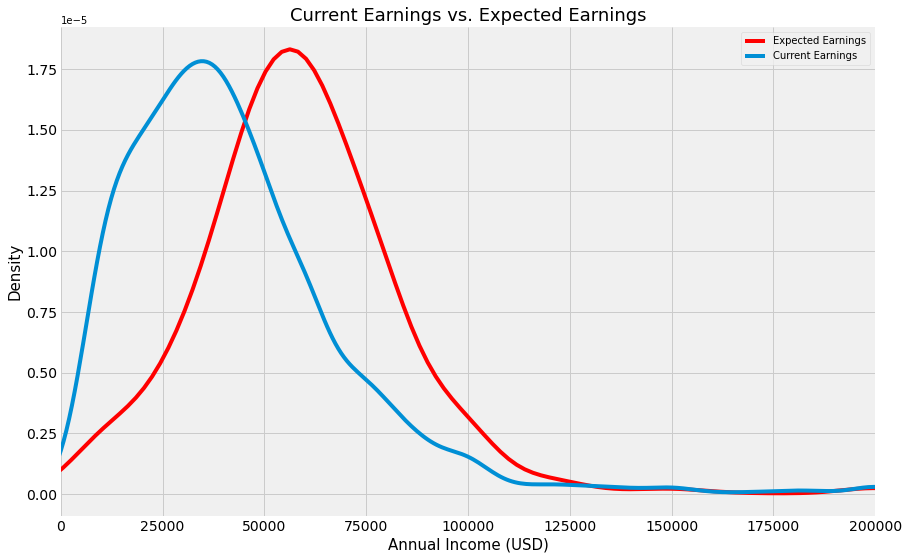

In [147]:
# Difference between current income and expected income
fig, ax = plt.subplots(figsize = (13,9))
df["ExpectedEarning"].plot.kde(xlim = (0, 200000), color = "red", label = "Expected Earnings")
df["Income"].plot.kde(label = "Current Earnings")
plt.title("Current Earnings vs. Expected Earnings", size = 18)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel("Density", size = 15)
plt.xlabel("Annual Income (USD)", size = 15)
plt.legend()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.show()

Survey participants stated they expected to earn around 61,000 USD, one person stated they hoped for 1,000,000. Without any plotting we can already see that the current median and average income is less than the expected income. Respondents expect to earn about 33 % more at their first developer job than at their current job, but this percentage is merely a result of the increase from the average current income, and on an individual basis it is expected to vary.

There is certainly a difference between what the average current salary is from the expected salary of the data. We know that many participants indicated careers that utilize programming skills. Higher income and a new career may likely explain the interest in programming.

We can find each person's desired salary increase (in percent) by utilizing the following formula

*Increase = New Number - Original Number*

*% increase = Increase / Original Number x 100*

Since we have missing data points in both columns we expect to see negative percentages in the new column that we create. Missing data won't be dropped, instead we'll ignore any percentages below 0.



In [54]:
# Column creation using formula above
df["Percent_Increase"] = (df["ExpectedEarning"] - df["Income"]) / df["Income"] * 100
df["Percent_Increase"].value_counts(bins = 20, normalize= True) * 100

(-106.658, 742.833]       48.145669
(742.833, 1575.667]        0.696211
(1575.667, 2408.5]         0.053555
(15733.833, 16566.667]     0.026777
(4074.167, 4907.0]         0.013389
(14068.167, 14901.0]       0.013389
(3241.333, 4074.167]       0.000000
(4907.0, 5739.833]         0.000000
(5739.833, 6572.667]       0.000000
(6572.667, 7405.5]         0.000000
(7405.5, 8238.333]         0.000000
(2408.5, 3241.333]         0.000000
(9071.167, 9904.0]         0.000000
(9904.0, 10736.833]        0.000000
(10736.833, 11569.667]     0.000000
(11569.667, 12402.5]       0.000000
(12402.5, 13235.333]       0.000000
(13235.333, 14068.167]     0.000000
(14901.0, 15733.833]       0.000000
(8238.333, 9071.167]       0.000000
Name: Percent_Increase, dtype: float64

In [55]:
df["Percent_Increase"].describe()

count     3656.000000
mean       118.342783
std        492.705755
min        -90.000000
25%         11.111111
50%         48.074074
75%        114.285714
max      16566.666667
Name: Percent_Increase, dtype: float64

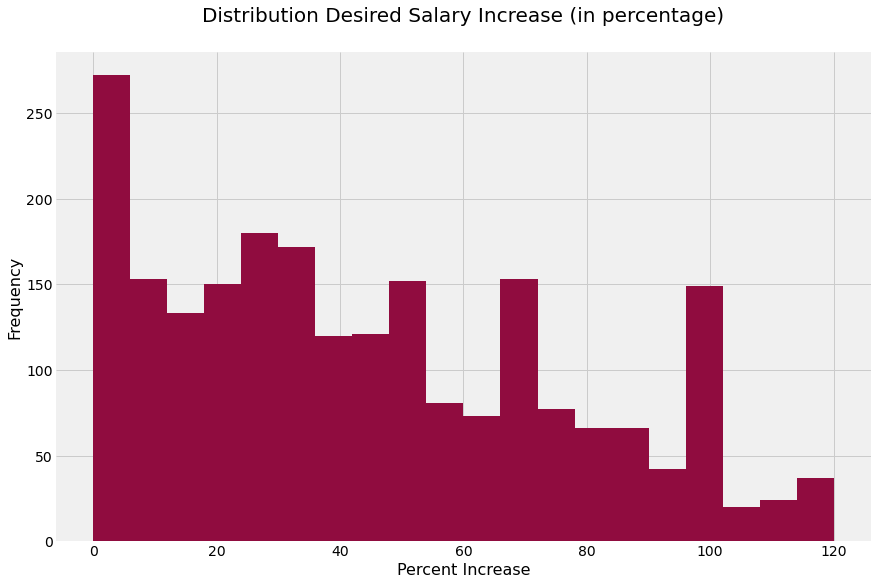

In [56]:
# Expected Income 
fig, ax = plt.subplots(figsize = (13,9))
df[(df["Percent_Increase"] <= 120) & (df["Percent_Increase"] >= 0)]["Percent_Increase"].plot.hist(bins = 20, color = "#900C3F")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.title("Distribution Desired Salary Increase (in percentage)", size = 20, y = 1.05)
plt.ylabel("Frequency", size = 16)
plt.xlabel("Percent Increase", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

A 5 % salary increase has the highest frequency, but we can see that the number varies up to 120 %. It's difficult to say that respondents prefer a particular degree of salary incrase based on the variation.

### Education Levels and the Time Spent Learning 
Does education influence the number of hours learning?
Respondents were asked to state the highest level of education completed.

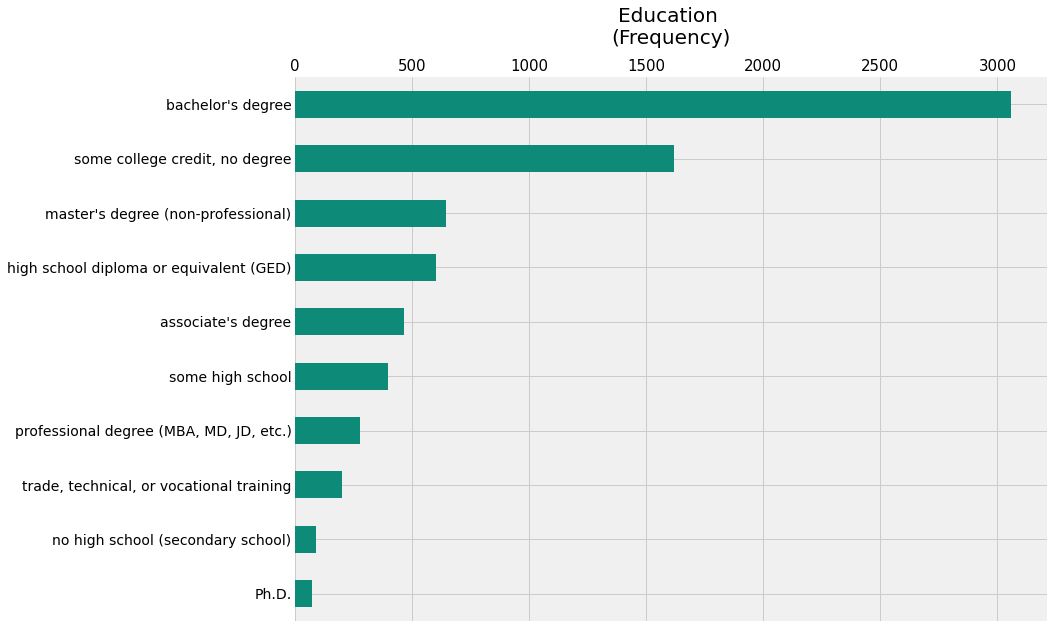

In [57]:
# Frequncy of education levels
fig, ax = plt.subplots(figsize = (12, 10))
ax = df["SchoolDegree"].value_counts().plot(kind = "barh", color = "#0E8A79")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Education \n(Frequency)", size = 20, y = 1.05)
plt.xticks(size = 15)
plt.yticks(size = 14)
plt.show()

The vast majority of respondents stated they have a bachelor's degree, followed by some college credit(no degree).

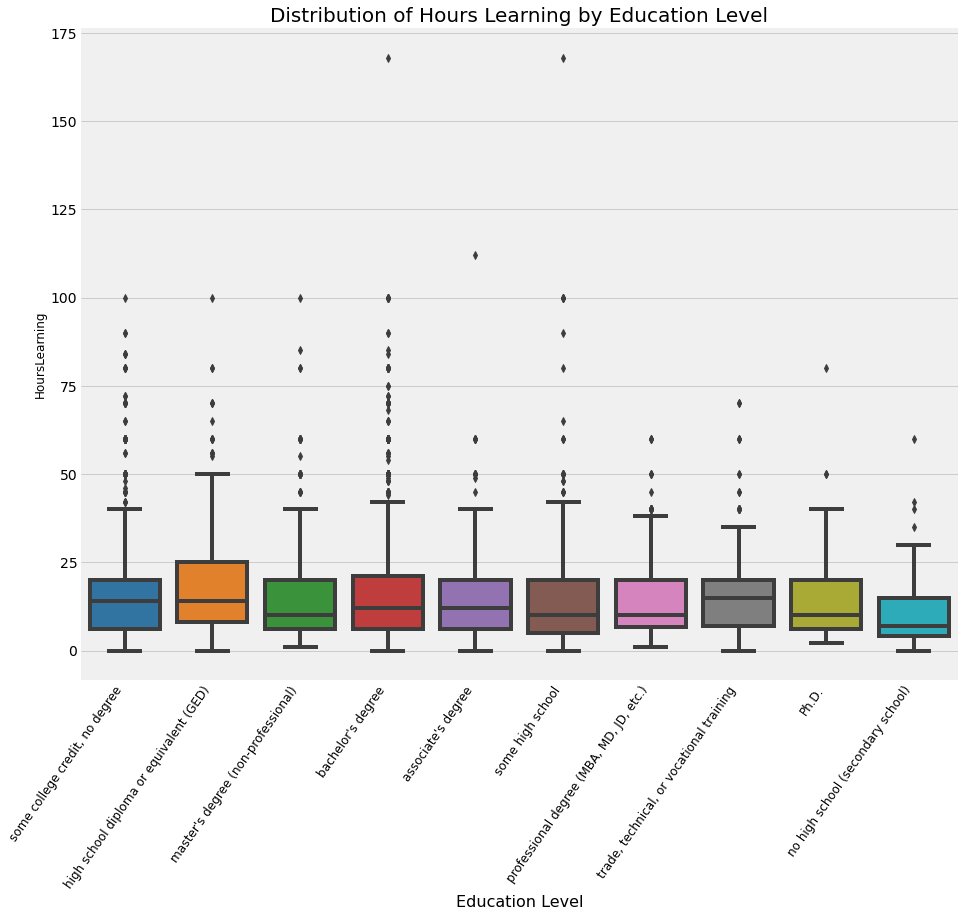

In [58]:
# Distribution of learning hours
plt.subplots(figsize = (14, 12))
sns.boxplot(x = "SchoolDegree", y = "HoursLearning", data = df, dodge=True, palette= "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(ha="right", rotation=55, size = 12)
plt.title("Distribution of Hours Learning by Education Level", size = 20)
plt.yticks(size =14)
plt.xlabel("Education Level", size = 16)
plt.show()

* Based on education level, the distribution of hours is broadly equal, naturally there are differences between each box and whisker
* Most outliers for each level show up at around 40 to 50 hours
* All of the outliers seem quite extreme, if we average the lowest outliers (~ 40 hours/wk) that is about 7 hours per day, and about 22 hours at the extreme

In [59]:
# Calculate median to avoid most of the skewness from outliers
# Median hours spent studying programming
df.groupby("SchoolDegree")["HoursLearning"].median().sort_values(ascending=False)


SchoolDegree
trade, technical, or vocational training    15.0
high school diploma or equivalent (GED)     14.0
some college credit, no degree              14.0
associate's degree                          12.0
bachelor's degree                           12.0
Ph.D.                                       10.0
master's degree (non-professional)          10.0
professional degree (MBA, MD, JD, etc.)     10.0
some high school                            10.0
no high school (secondary school)            7.0
Name: HoursLearning, dtype: float64

We don't need to focus too much on weekly hours learning, since we price our subscriptions on a monthly basis. However, this provides more insight into potential customer engagement as a month is not as granular as a week. 

Generally, degree holders less than a bachelor's degree (including just high school education) spend more time per week than higher level degree holders.

In [60]:
import warnings
warnings.filterwarnings("ignore")

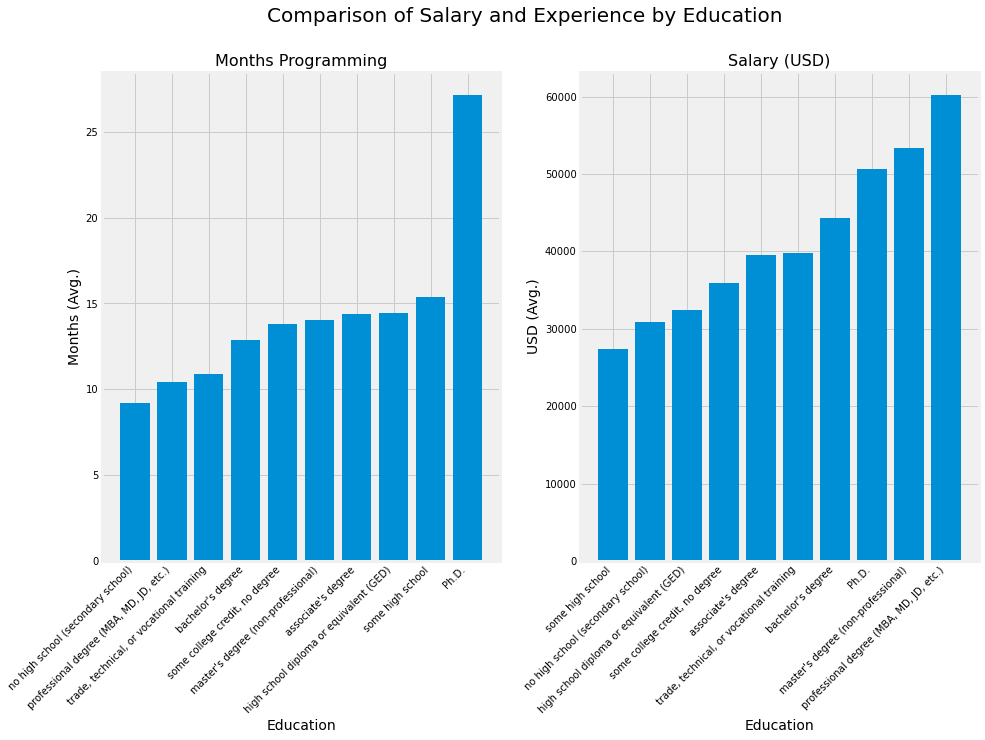

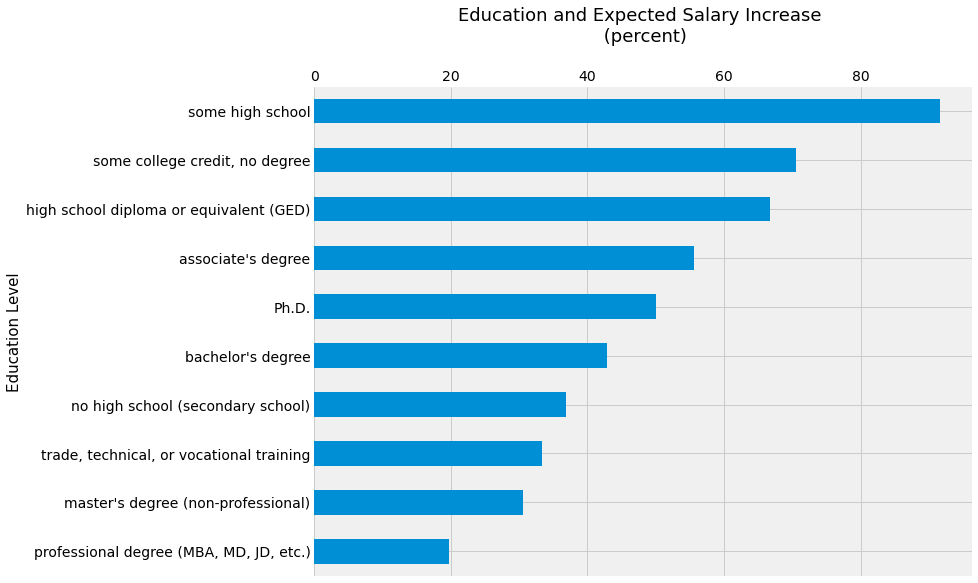

In [61]:
# Assign groupby objects for plotting using SchoolDegree 
schl_dgree = df.groupby("SchoolDegree").mean().sort_values(by = "MonthsProgramming") # sort by the average number of months programming
degree_income = df.groupby("SchoolDegree").mean().sort_values(by = "Income") # sort by the average income

# Subplots
fig, axes = plt.subplots(1, 2, figsize = (14,9))

# Main title
fig.suptitle("Comparison of Salary and Experience by Education", fontsize=20)

# Plot results months programming
axes[0].bar(schl_dgree.index, schl_dgree["MonthsProgramming"])
axes[0].set_xticklabels(labels = schl_dgree.index, ha = "right", rotation = 45)
axes[0].set_title("Months Programming", fontsize = 16)
axes[0].set_ylabel("Months (Avg.)", fontsize = 14)
axes[0].set_xlabel("Education", fontsize = 14)

# Plot results salary
axes[1].bar(degree_income.index, degree_income["Income"])
axes[1].set_xticklabels(labels = degree_income.index, ha = "right", rotation = 45)
axes[1].set_title("Salary (USD)", fontsize = 16)
axes[1].set_ylabel("USD (Avg.)", fontsize = 14)
axes[1].set_xlabel("Education", fontsize = 14)

# Education and expected salary increase
fig, ax = plt.subplots(figsize = (10.5, 9))
df.groupby("SchoolDegree")["Percent_Increase"].median().sort_values(ascending=False).plot(kind = "barh")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Education and Expected Salary Increase \n (percent)", size = 18, y = 1.08)
plt.xticks(size = 14)
plt.ylabel("Education Level", size = 15)
plt.yticks(size = 14)

plt.show()

* On average, Ph.D. holders have over two years of programming experience (far more than any other degree older)
* Excluding Ph.D. holders, on average, people with only some high school and high school diploma (GED) have the most number of months programming
* Education levels (high school, associates, some college credit) with the lowest average income typically have the most "experience" programming (except for Ph.Ds) 
* Lowest earning education levels generally expect a higher increase in income, this may explain why these groups typically have invested more time learning new programming skills

### Employment and the Time Spent Learning 

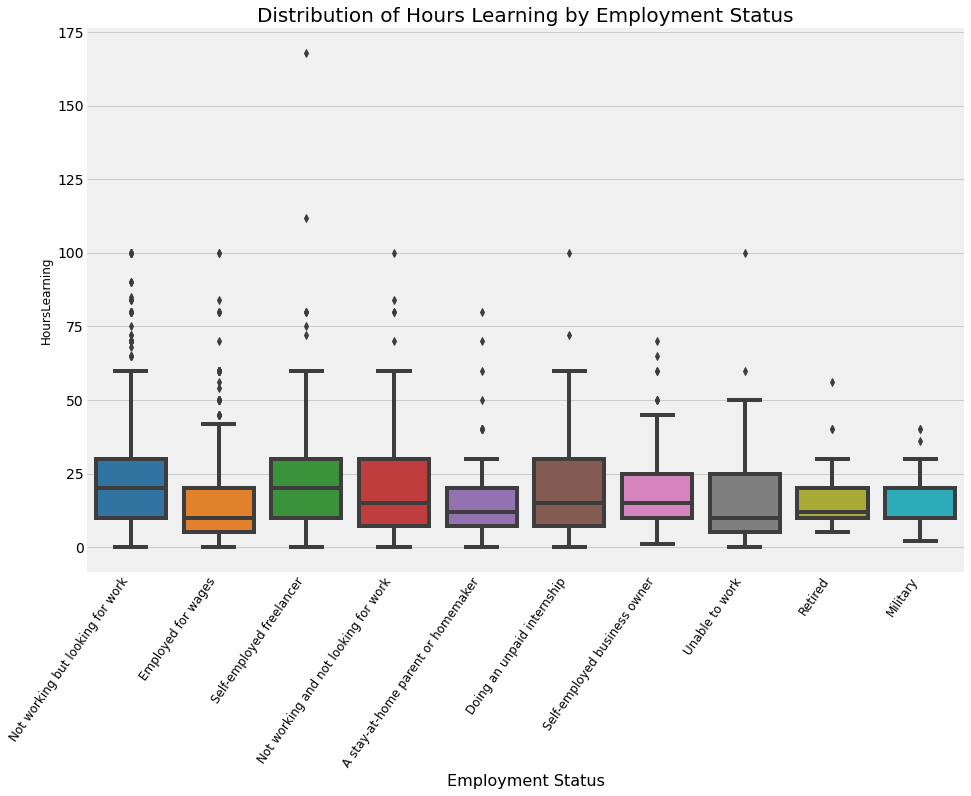

In [62]:
# Employment status distribution
plt.subplots(figsize = (14, 10))
sns.boxplot(x = "EmploymentStatus", y = "HoursLearning", data = df, dodge=True, palette= "tab10")
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.xticks(ha="right", rotation=55, size = 12)
plt.title("Distribution of Hours Learning by Employment Status", size = 20)
plt.yticks(size =14)
plt.xlabel("Employment Status", size = 16)
plt.show()

In [130]:
# Hours spent per week by employment status
df.groupby("EmploymentStatus")["HoursLearning"].median().sort_values(ascending=False)

EmploymentStatus
Not working but looking for work        20.0
Self-employed freelancer                20.0
Doing an unpaid internship              15.0
Not working and not looking for work    15.0
Self-employed business owner            15.0
A stay-at-home parent or homemaker      12.0
Retired                                 12.0
Employed for wages                      10.0
Military                                10.0
Unable to work                          10.0
Name: HoursLearning, dtype: float64

We still see many instances of people reporting they spend over 50 hours per week programming. It is more reasonable to assume that unemployed individuals could spend up to 7 to 8 hours programming. It's possible that self employed freelancers and interns (especially in IT/software development) counted supplemental time learning outside of work as "hours learning". Jobs and employment situations that may occupy a large portion of a person's time have the smallest distribution of hours learning.

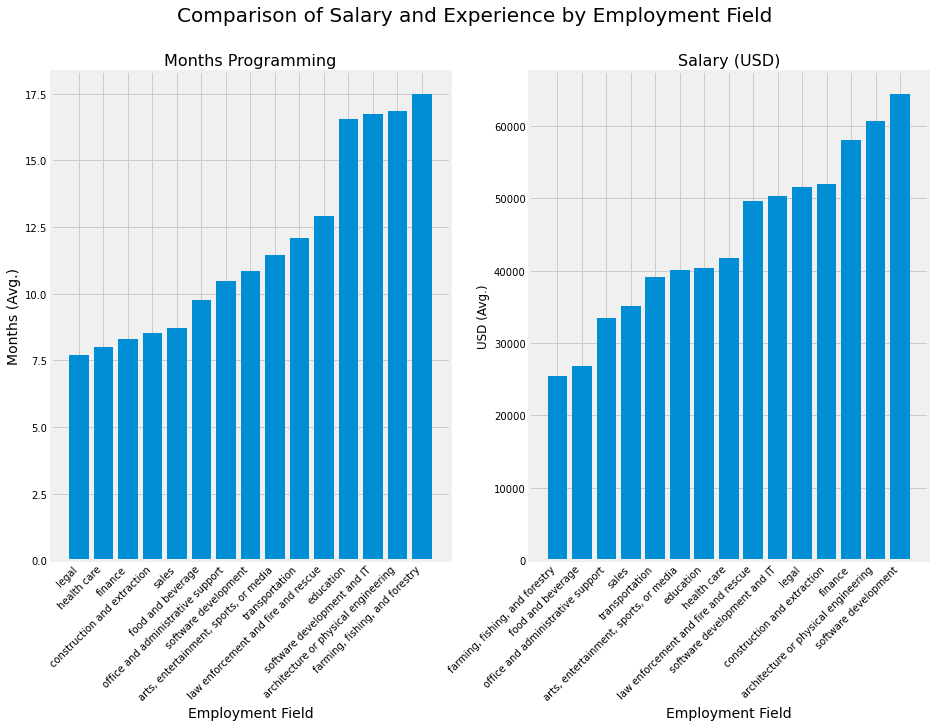

In [64]:
# Assign groupby objects for plotting using SchoolDegree 
empfld_months_prg = df.groupby("EmploymentField").mean().sort_values(by="MonthsProgramming") # sort by the average number of months programming
empfld_income = df.groupby("EmploymentField").mean().sort_values(by="Income") # sort by the average income

# Subplots
fig, axes = plt.subplots(1, 2, figsize = (14,9))

# Main title
fig.suptitle("Comparison of Salary and Experience by Employment Field", fontsize=20)

# Plot results months programming
axes[0].bar(empfld_months_prg.index, empfld_months_prg["MonthsProgramming"])
axes[0].set_xticklabels(labels = empfld_months_prg.index, ha = "right", rotation = 45)
axes[0].set_title("Months Programming", fontsize = 16)
axes[0].set_ylabel("Months (Avg.)", fontsize = 14)
axes[0].set_xlabel("Employment Field", fontsize = 14)

# Plot results salary
axes[1].bar(empfld_income.index, empfld_income["Income"])
axes[1].set_xticklabels(labels = empfld_income.index, ha = "right", rotation = 45)
axes[1].set_title("Salary (USD)", fontsize = 16)
axes[1].set_ylabel("USD (Avg.)")
axes[1].set_xlabel("Employment Field", fontsize = 14)
plt.show()

The graphs above indicate a few points:
- People in lower paying jobs unrelated to programming reported that they have spent longer programming (probably outside of their current jobs)
- IT, archicture/physical engineering, and software development careers are the highest paid with the most programming experience (these individuals may be learning in their free time to boost their careers)

## Conclusion
The analysis of freeCodeCamp's survey indicates that the United States should be the prime candidate for advertising based on the following criteria:
* Greatest number of new programmers
* Monthly spending is highest out of the English speaking countries

The second candidate can be India:
* Second highest number of new programmers
* Monthly spending is low, but there is potential for attracting new customers based off of the population density of India

We believe we explained *why* people are learning and practicing a new skill like programming. The information in this survey points to a desire for upward mobility, career advancement, and higher income. We demonstrated that the difference between current yearly salary from the expected salary was great enough to explain the decisions of survey participants. Many people indicated that they are interested in software/data science careers outside of the current one they have with an expectation of increased salary.

In [65]:
(stk_exchange.apply(pd.isnull).sum()/stk_exchange.shape[0] * 100).sort_values(ascending = False)

ConvertedSalary       51.745486
Salary                48.836174
SalaryType            48.338476
CurrencySymbol        40.670679
Currency              37.273785
Gender                34.784280
Age                   34.678064
AssessBenefits11      34.331091
AssessBenefits5       34.330079
AssessBenefits1       34.330079
AssessBenefits2       34.330079
AssessBenefits3       34.330079
AssessBenefits4       34.330079
AssessBenefits8       34.330079
AssessBenefits6       34.330079
AssessBenefits7       34.330079
AssessBenefits9       34.330079
AssessBenefits10      34.330079
AssessJob7            32.239138
AssessJob10           32.239138
AssessJob9            32.239138
AssessJob8            32.239138
AssessJob6            32.239138
AssessJob4            32.239138
AssessJob3            32.239138
AssessJob2            32.239138
AssessJob1            32.239138
AssessJob5            32.239138
JobSatisfaction       29.921602
CompanySize           27.640484
HopeFiveYears         23.404987
CareerSa

In [68]:
hobby = stk_exchange["Hobby"].value_counts()
hobby

Yes    79897
No     18958
Name: Hobby, dtype: int64

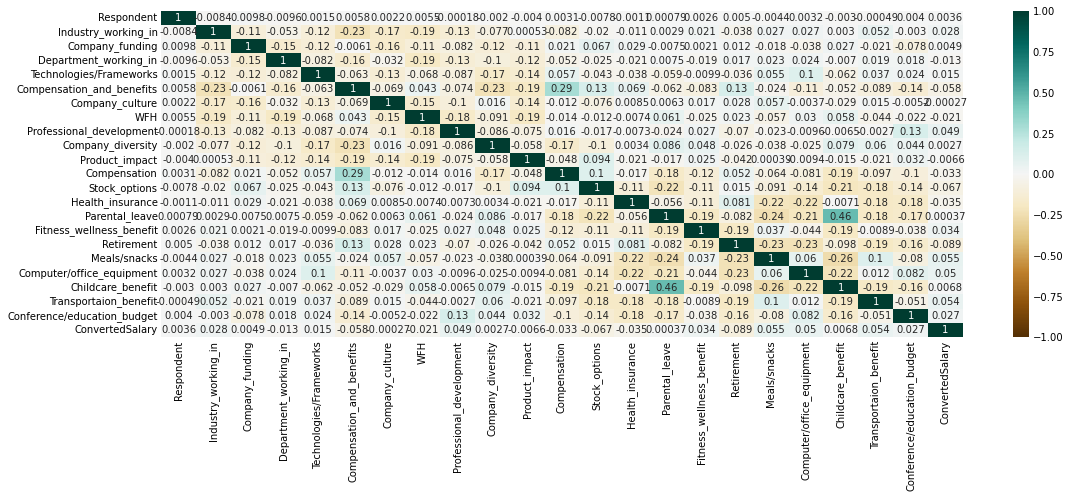

In [69]:
plt.figure(figsize=(16, 6))
sns.heatmap(stk_exchange.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

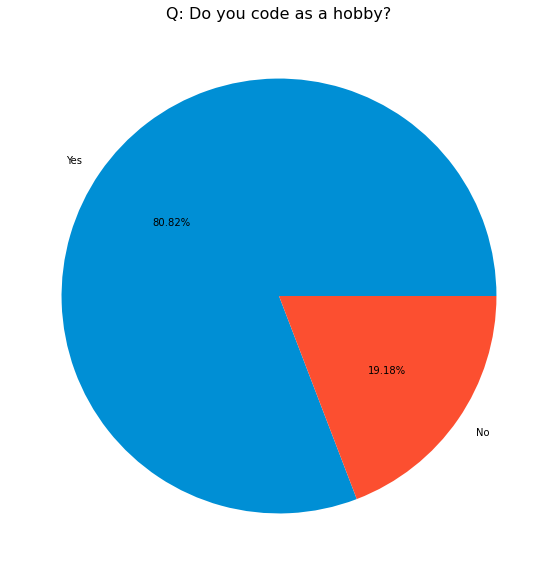

In [70]:
# Change labels from 0 and 1 to "No" and "Yes" for easier comprehension
labels = ["Yes", "No"]

# Plot results as pie chart
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(hobby, labels = labels, autopct= "%.2f%%")
plt.title("Q: Do you code as a hobby?", size = 16)
plt.show()

In [89]:
stk_exchange["FormalEducation"].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: FormalEducation, dtype: int64

In [86]:
stk_exchange["ConvertedSalary"].describe()

count    4.770200e+04
mean     9.578086e+04
std      2.023482e+05
min      0.000000e+00
25%      2.384400e+04
50%      5.507500e+04
75%      9.300000e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64

In [92]:
stk_exchange["Country"].value_counts()

United States      20309
India              13721
Germany             6459
United Kingdom      6221
Canada              3393
                   ...  
Sierra Leone           1
Saint Lucia            1
Solomon Islands        1
Grenada                1
Guinea-Bissau          1
Name: Country, Length: 183, dtype: int64

In [90]:
stk_exchange

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,Industry_working_in,Company_funding,Department_working_in,Technologies/Frameworks,Compensation_and_benefits,Company_culture,WFH,Professional_development,Company_diversity,Product_impact,Compensation,Stock_options,Health_insurance,Parental_leave,Fitness_wellness_benefit,Retirement,Meals/snacks,Computer/office_equipment,Childcare_benefit,Transportaion_benefit,Conference/education_budget,Gender,Age,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,25 - 34 years old,NaN,NaN,Monthly,NaN,KES
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,Male,35 - 44 years old,British pounds sterling (£),51000,Yearly,70841.0,GBP
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,35 - 44 years old,U.S. dollars ($),NaN,NaN,NaN,NaN
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,Slightly satisfied,Moderately satisfied,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,1.0,10.0,2.0,4.0,8.0,3.0,11.0,7.0,5.0,9.0,6.0,Male,18 - 24 years old,South African rands (R),260000,Yearly,21426.0,ZAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,0-2 years,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full